In [1]:
import yfinance as yf

stock_tickers = ['META', 'NFLX', 'TSLA','NVDA','AMZN','AAPL','GOOGL','INTC','BAC','OSCR','VALE','RIG']
database = yf.download(stock_tickers,start='2012-01-01',end ='2025-01-01' ,auto_adjust=True)
database = database['Close']

data = database.dropna().pct_change(1).dropna()
data

Failed to get ticker 'RIG' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'META' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'AMZN' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'INTC' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'GOOGL' reason: Expecting value: line 1 column 1 (char 0)


[                       0%%                      ]

Failed to get ticker 'NFLX' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'NVDA' reason: Expecting value: line 1 column 1 (char 0)


[****************      33%%                      ]  4 of 12 completed

Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)


[**********************50%%                      ]  6 of 12 completed

Failed to get ticker 'TSLA' reason: Expecting value: line 1 column 1 (char 0)


[**********************67%%******                ]  8 of 12 completed

Failed to get ticker 'VALE' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'BAC' reason: Expecting value: line 1 column 1 (char 0)


[**********************75%%**********            ]  9 of 12 completed

Failed to get ticker 'OSCR' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  11 of 12 completed


12 Failed downloads:
['RIG', 'META', 'AMZN', 'INTC', 'GOOGL', 'NFLX', 'NVDA', 'AAPL', 'TSLA', 'VALE', 'BAC', 'OSCR']: Exception('%ticker%: No timezone found, symbol may be delisted')


,AAPL,AMZN,BAC,GOOGL,INTC,META,NFLX,NVDA,OSCR,RIG,TSLA,VALE
Date,,,,,,,,,,,,


In [6]:
import requests
requests.get("https://query1.finance.yahoo.com").status_code


429

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import skew as np_skew,kurtosis as np_kurtosis

def sk_Criterion(weight,data):
    Lambda = 3
    W = 1
    Wbar = (1+0.25)/100
    portfolio_return = np.multiply(data,np.transpose(weight))
    portfolio_return = portfolio_return.sum(axis=1)
    mean = np.mean(portfolio_return,axis=0)
    std = np.std(portfolio_return,axis=0)
    skew = np_skew(portfolio_return)
    kurt = np_kurtosis(portfolio_return)
    
    mv_criterion = (Wbar**-1-Lambda)/1+Lambda + (Wbar**-Lambda)*W*mean - 0.5*Lambda*(W**2)*(std**2)*Wbar**(-1-Lambda) 
    
    criterion = mv_criterion + ((Lambda*(Lambda+1))/6)*(W**3)*(Wbar**-2-Lambda)*skew -((Lambda*(Lambda+1)*(Lambda+2))/24)*(W**4)*(Wbar**-3-Lambda)*kurt
    
    return -1*criterion
    

In [4]:
import numpy as np
from scipy.optimize import minimize



validation_score = 0.3
train_size = int(len(data)*(1-validation_score))
train_data = data.iloc[:train_size,:]
test_data = data.iloc[train_size:,:]

n = data.shape[1]
x0 = np.ones(n)

cons = ({'type':'eq','fun':lambda x:np.sum(abs(x))-1})
Bounds = [(0,1) for i in range(0,n)]
res = minimize(sk_Criterion, x0, method="SLSQP", args=(train_data,), bounds=Bounds, constraints=cons, options={'disp':False})
res_weight = res.x
res_weight


C:\Users\ndebe\AppData\Local\Temp\ipykernel_22260\1254289171.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  skew = np_skew(portfolio_return)
C:\Users\ndebe\AppData\Local\Temp\ipykernel_22260\1254289171.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  kurt = np_kurtosis(portfolio_return)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

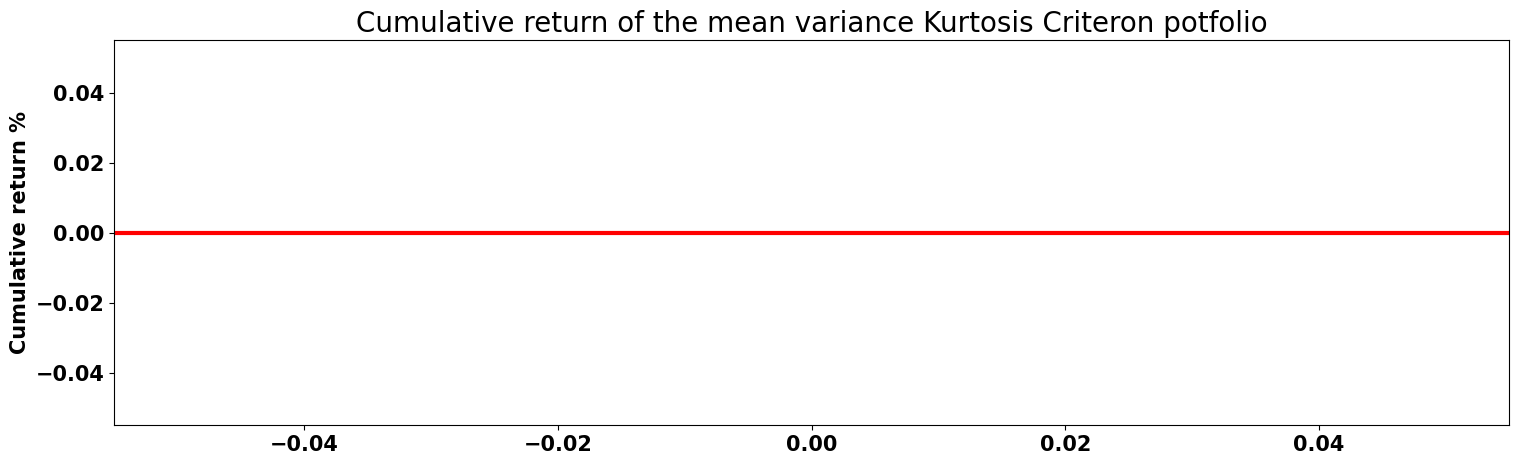

In [5]:
#Testing the perfomance on the test data
import matplotlib.pyplot as plt


portfolio_return_test = np.multiply(test_data,np.transpose(res_weight))
portfolio_return_test = portfolio_return_test.sum(axis=1)

#plot the cumulative return
plt.figure(figsize=(18,5))
plt.plot(np.cumsum(portfolio_return_test)*100,color="#035593",linewidth=3)
plt.ylabel("Cumulative return %", size=15,fontweight="bold")
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.title("Cumulative return of the mean variance Kurtosis Criteron potfolio", size=20)
plt.axhline(0, color="r",linewidth=3)
plt.show()